Twitter Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sentimentdataset.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

In [5]:
df.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [6]:
df.isnull().sum()

Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [7]:
df.duplicated().sum()

20

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       712 non-null    object 
 1   Sentiment  712 non-null    object 
 2   Timestamp  712 non-null    object 
 3   User       712 non-null    object 
 4   Platform   712 non-null    object 
 5   Hashtags   712 non-null    object 
 6   Retweets   712 non-null    float64
 7   Likes      712 non-null    float64
 8   Country    712 non-null    object 
 9   Year       712 non-null    int64  
 10  Month      712 non-null    int64  
 11  Day        712 non-null    int64  
 12  Hour       712 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 77.9+ KB


The Retweets and Likes features are float, but idelly they can be the integers.

In [11]:
df['Retweets'] = df['Retweets'].astype('int')
df['Likes'] = df['Likes'].astype('int')

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       712 non-null    object        
 1   Sentiment  712 non-null    object        
 2   Timestamp  712 non-null    datetime64[ns]
 3   User       712 non-null    object        
 4   Platform   712 non-null    object        
 5   Hashtags   712 non-null    object        
 6   Retweets   712 non-null    int64         
 7   Likes      712 non-null    int64         
 8   Country    712 non-null    object        
 9   Year       712 non-null    int64         
 10  Month      712 non-null    int64         
 11  Day        712 non-null    int64         
 12  Hour       712 non-null    int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 77.9+ KB


Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Happy              14
                   ..
Dazzle              1
Adrenaline          1
Harmony             1
ArtisticBurst       1
Elegance            1
Name: count, Length: 279, dtype: int64


Text(0, 0.5, 'Count')

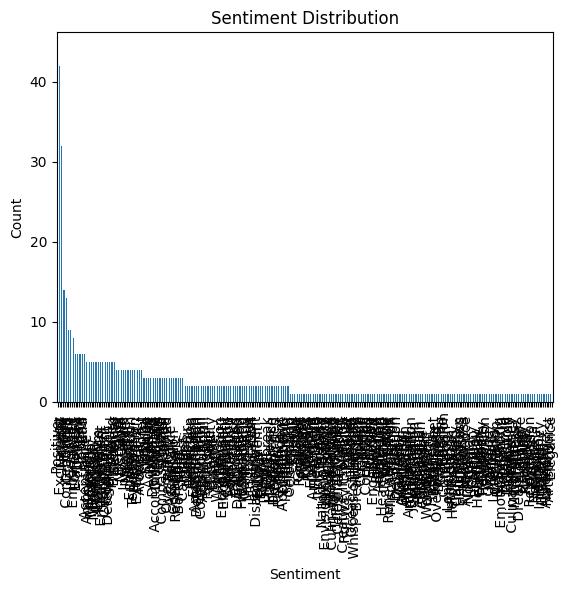

In [14]:
print(df['Sentiment'].value_counts())

df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

In [15]:
df['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [16]:
positive_words = [
    'Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 
    'Affection', 'Awe', 'Acceptance', 'Adoration', 'Anticipation', 'Calmness', 
    'Excitement', 'Kind', 'Pride', 'Elation', 'Euphoria', 'Contentment', 'Serenity', 
    'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 
    'Enthusiasm', 'Fulfillment', 'Reverence', 'Zest', 'Hopeful', 'Proud', 
    'Grateful', 'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 
    'Inspired', 'Confident', 'Thrill', 'Overjoyed', 'Inspiration', 'Motivation', 
    'JoyfulReunion', 'Satisfaction', 'Blessed', 'Appreciation', 'Confidence', 
    'Accomplishment', 'Wonderment', 'Optimism', 'Enchantment', 'Intrigue', 
    'PlayfulJoy', 'Mindfulness', 'DreamChaser', 'Elegance', 'Whimsy', 'Harmony', 
    'Creativity', 'Radiance', 'Wonder', 'Rejuvenation', 'Coziness', 'Adventure', 
    'Melodic', 'FestiveJoy', 'InnerJourney', 'Freedom', 'Dazzle', 'Adrenaline', 
    'ArtisticBurst', 'CulinaryOdyssey', 'Resilience', 'Immersion', 'Spark', 
    'Marvel', 'Positivity', 'Friendship', 'Success', 'Exploration', 'Amazement', 
    'Romance', 'Captivation', 'Tranquility', 'Grandeur', 'Emotion', 'Energy', 
    'Celebration', 'Charm', 'Ecstasy', 'Colorful', 'Hypnotic', 'Connection', 
    'Iconic', 'Journey', 'Engagement', 'Touched', 'Triumph', 'Heartwarming', 
    'Breakthrough', 'Joy in Baking', 'Envisioning History', 'Imagination', 
    'Vibrancy', 'Mesmerizing', 'Culinary Adventure', 'Winter Magic', 
    'Thrilling Journey', "Nature's Beauty", 'Celestial Wonder', 
    'Creative Inspiration', 'Runway Creativity', "Ocean's Freedom", 'Relief', 'Happy'
]

negative_words = [
    'Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 
    'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 
    'Frustration', 'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 
    'Regret', 'Heartbreak', 'Betrayal', 'Suffering', 'EmotionalStorm', 'Isolation', 
    'Disappointment', 'LostLove', 'Melancholy', 'Exhaustion', 'Sorrow', 'Darkness', 
    'Desperation', 'Ruins', 'Desolation', 'Heartache', 'Solitude', 'Hate', 'Bad', 
    'Embarrassed', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous', 'Devastated', 
    'Frustrated', 'Envious', 'Dismissive'
]

In [17]:
positive_words_lower = [word.lower() for word in positive_words]
negative_words_lower = [word.lower() for word in negative_words]

def map_sentiment(sentiment: str) -> str:
    if sentiment.strip().lower() in positive_words_lower:
        return 'Positive'
    elif sentiment.strip().lower() in negative_words_lower:
        return 'Negative'
    else:
        return 'Neutral'
    
df['Sentiment'] = df['Sentiment'].apply(map_sentiment)

In [18]:
df['Sentiment'].value_counts()

Sentiment
Positive    430
Negative    160
Neutral     122
Name: count, dtype: int64

In [19]:
df['Text_length'] = df['Text'].str.len()

Text(0, 0.5, 'Text Length')

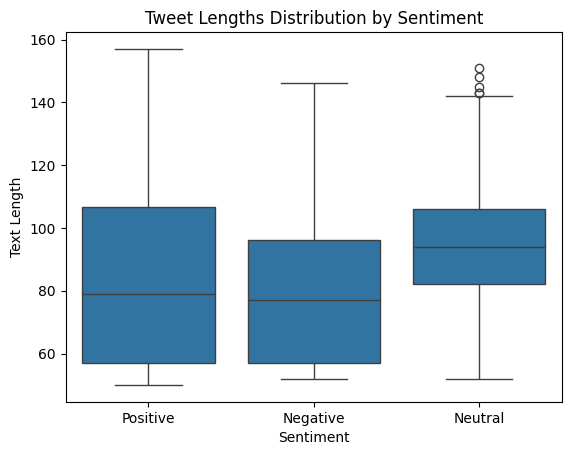

In [20]:
import seaborn as sns

sns.boxplot(x='Sentiment', y='Text_length', data=df)
plt.title('Tweet Lengths Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length')

The neutral tweets seems longer than the positive and negative.

In [21]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text: str) -> str:

    if not isinstance(text, str):
        return ""

    text = text.lower()
    text = re.sub(r'@\\w+', '', text)
    text = re.sub(r'http\\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"
                                u"\U0001F300=\U0001F5FF"
                                u"\U0001F680-\U0001F6FF"
                                u"\U0001F1E0=\U0001F1FF"
                                u"\U00002702-\U000027B0"
                                u"\U000024C2-\U0001F251"
                                u"\U0001f926-\U0001f937"
                                u"\U00010000-\U0010ffff"
                                u"\u2640-\u2642"
                                u"\u2600-\u2B55"
                                u"\u200d"
                                u"\u23cf"
                                u"\u23e9"
                                u"\u231a"
                                u"\ufe0f"
                                u"\u303d"
                                "]+", 
                                flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    tokens = word_tokenize(text)
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(filtered_tokens)

df['Cleaned_Text'] = df['Text'].apply(clean_text)

df[['Text', 'Cleaned_Text']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/prashikbhimte/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Text,Cleaned_Text
0,Enjoying a beautiful day at the park! ...,enjoying beautiful day park
1,Traffic was terrible this morning. ...,traffic terrible morning
2,Just finished an amazing workout! 💪 ...,finished amazing workout
3,Excited about the upcoming weekend getaway! ...,excited upcoming weekend getaway
4,Trying out a new recipe for dinner tonight. ...,trying new recipe dinner tonight


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

X = tfidf.fit_transform(df['Cleaned_Text'])
y = df['Sentiment']

print("Shape of feature matrix (X) : ", X.shape)
print("Shape of target vector (y) : ", y.shape)

Shape of feature matrix (X) :  (712, 2237)
Shape of target vector (y) :  (712,)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification report : ", classification_report(y_test, y_pred))

Accuracy :  0.6923076923076923
Classification report :                precision    recall  f1-score   support

    Negative       1.00      0.34      0.51        32
     Neutral       1.00      0.08      0.15        25
    Positive       0.66      1.00      0.80        86

    accuracy                           0.69       143
   macro avg       0.89      0.47      0.49       143
weighted avg       0.80      0.69      0.62       143



The overall model has performed well, specificlly on the poistive class, it has predicted all positive class corretlly, but has poor performance on the negative and neutral. Also all positive class predicted were not actually positive. Most negative and neutral class were not predicted correcttly, most were predicted as the positive. Seems this would be because of the imbalanced dataset.

In [26]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
y_pred = model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification report : ", classification_report(y_test, y_pred))

Accuracy :  0.8391608391608392
Classification report :                precision    recall  f1-score   support

    Negative       0.84      0.81      0.83        32
     Neutral       0.85      0.44      0.58        25
    Positive       0.84      0.97      0.90        86

    accuracy                           0.84       143
   macro avg       0.84      0.74      0.77       143
weighted avg       0.84      0.84      0.83       143



In [28]:
import joblib

joblib.dump(tfidf, '/home/prashikbhimte/projects/ML-Projects/2_Twitter_Sentiment_Analysis/trained_models/logistic_reg_model.joblib')

joblib.dump(model, '/home/prashikbhimte/projects/ML-Projects/2_Twitter_Sentiment_Analysis/trained_models/tfidf_vectorizer.joblib')

print("Model and Vectorizer are saved successfully!")

Model and Vectorizer are saved successfully!


In [29]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(class_weight='balanced', max_iter=2000)
svm_model.fit(X_train, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,verbose,0
,random_state,None


In [30]:
y_pred_svm = svm_model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_svm))
print("Classification report : ", classification_report(y_test, y_pred_svm))

Accuracy :  0.8251748251748252
Classification report :                precision    recall  f1-score   support

    Negative       0.83      0.78      0.81        32
     Neutral       0.83      0.40      0.54        25
    Positive       0.82      0.97      0.89        86

    accuracy                           0.83       143
   macro avg       0.83      0.72      0.74       143
weighted avg       0.83      0.83      0.81       143



The SVM model performed well but does not beat the Logistic regression.

In [31]:
from sklearn.ensemble import  RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred_rf = svm_model.predict(X_test)

print("Accuracy : ", accuracy_score(y_test, y_pred_rf))
print("Classification report : ", classification_report(y_test, y_pred_rf))

Accuracy :  0.8251748251748252
Classification report :                precision    recall  f1-score   support

    Negative       0.83      0.78      0.81        32
     Neutral       0.83      0.40      0.54        25
    Positive       0.82      0.97      0.89        86

    accuracy                           0.83       143
   macro avg       0.83      0.72      0.74       143
weighted avg       0.83      0.83      0.81       143



It seems the simple model is more fitted to the dataset than the complex one. Therefor the Logistic model, a simple one has better performnace. The Random forest also perform well but doesn't beat the logistic one.

In [33]:
from gensim.models import Word2Vec

tokenized_text = df['Cleaned_Text'].apply(lambda x: x.split())

w2v_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=2, workers=4)

print("Vocabulary size : ", len(w2v_model.wv.index_to_key))

Vocabulary size :  991


In [34]:
def document_vector(doc, model):
    doc = [word for word in doc.split() if word in model.wv.index_to_key]

    if not doc:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

X_w2v = np.array([document_vector(doc, w2v_model) for doc in df['Cleaned_Text']])

print("Shape of Word2Vec feature matrix : ", X_w2v.shape)

Shape of Word2Vec feature matrix :  (712, 100)


In [35]:
y = df['Sentiment']

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled_w2v, y_train_resmapled_w2v = ros.fit_resample(X_train_w2v, y_train_w2v)

In [37]:
model_w2v = LogisticRegression(max_iter=1000)
model_w2v.fit(X_train_resampled_w2v, y_train_resmapled_w2v)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [38]:
y_pred_w2v = model_w2v.predict(X_test_w2v)

print("Accuracy : ", accuracy_score(y_test, y_pred_w2v))
print("Classification report : ", classification_report(y_test, y_pred_w2v))

Accuracy :  0.5034965034965035
Classification report :                precision    recall  f1-score   support

    Negative       0.36      0.53      0.43        32
     Neutral       0.22      0.36      0.27        25
    Positive       0.84      0.53      0.65        86

    accuracy                           0.50       143
   macro avg       0.47      0.48      0.45       143
weighted avg       0.62      0.50      0.54       143



Interestingly the TF-IDF model has outperformed than the Word2Vec model, this would be, because of our smaller dataset.

In [39]:
import tensorflow as tf
from transformers import DistilBertTokenizer, TFDistilBertModel

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

bert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased', use_safetensors=False)

2025-09-20 15:55:21.529834: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-20 15:55:21.694311: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-20 15:55:28.093747: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
/home/prashikbhimte/projects/ML-Projects/2_Twitter_Sentiment_Analysis/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-20 15:55:34.424588: E external/local_xla/xla/stream_executor/cuda/cuda_plat

In [40]:
tokenized = df['Text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=128, truncation=True, padding='max_length')))

max_len = 128
padded = np.array([i + [0]*(max_len - len(i)) for i in tokenized.values])

attention_mask = np.where(padded != 0, 1, 0)

batch_size = 32
embeddings = []
for i in range(0, padded.shape[0], batch_size):
    batch = padded[i:i+batch_size]
    mask = attention_mask[i:i+batch_size]
    input_ids = tf.convert_to_tensor(batch)
    attention_mask_tensor = tf.convert_to_tensor(mask)

    with tf.device('/CPU:0'):
        outputs = bert_model(input_ids, attention_mask=attention_mask_tensor)
    
    last_hidden_states = outputs[0]

    cls_embeddings = last_hidden_states[:, 0, :].numpy()
    embeddings.append(cls_embeddings)

X_bert = np.concatenate(embeddings, axis=0)

print("Shape of BERT feature matrix : ", X_bert.shape)

Shape of BERT feature matrix :  (712, 768)


In [41]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
ros = RandomOverSampler(random_state=42)
X_train_resampled_bert, y_train_resmapled_bert = ros.fit_resample(X_train_bert, y_train_bert)

In [43]:
model_bert = LogisticRegression(max_iter=1000)
model_bert.fit(X_train_resampled_bert, y_train_resmapled_bert)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
y_pred_bert = model_bert.predict(X_test_bert)

print("Accuracy : ", accuracy_score(y_test, y_pred_bert))
print("Classification report : ", classification_report(y_test, y_pred_bert))

Accuracy :  0.8321678321678322
Classification report :                precision    recall  f1-score   support

    Negative       0.79      0.84      0.82        32
     Neutral       0.55      0.48      0.51        25
    Positive       0.92      0.93      0.92        86

    accuracy                           0.83       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.83      0.83      0.83       143



In [46]:
joblib.dump(model_bert, '/home/prashikbhimte/projects/ML-Projects/2_Twitter_Sentiment_Analysis/trained_models/bert_logistic_reg_model.joblib')

['/home/prashikbhimte/projects/ML-Projects/2_Twitter_Sentiment_Analysis/trained_models/bert_logistic_reg_model.joblib']